In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

## Hough Circle Transform

The goal of the hough circle transform would be to identify the wooden knots as circles. Because there is so much noise and the edges of the circular knots are not well defined, this method is still under testing.

In [10]:
img_path = r'..//images//samples//99300070.bmp'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
rows = cimg.shape[0]
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,rows/16,
                            param1=100,param2=200,minRadius=5,maxRadius=100)

if circles is not None:
    circles = np.uint16(np.around(circles))

    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

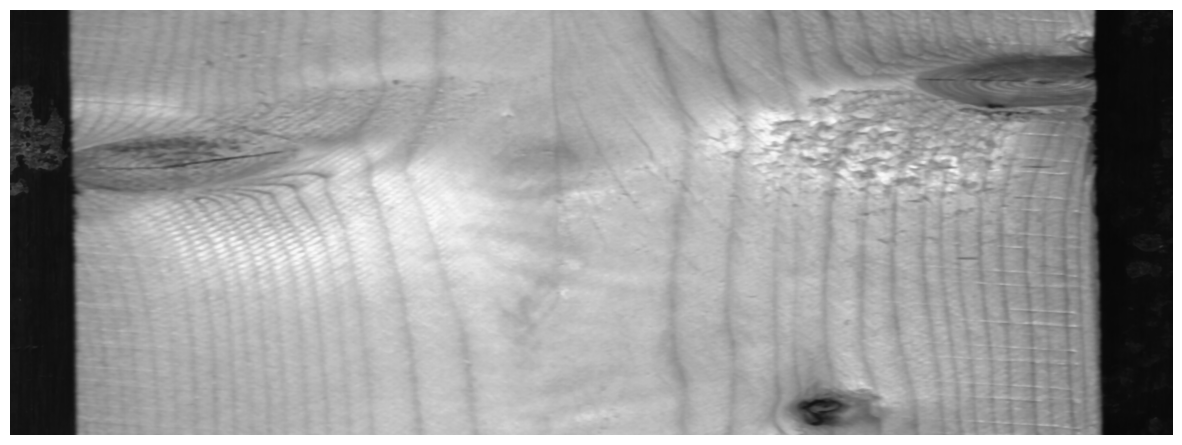

In [14]:
plt.figure(figsize=(15,10))
plt.imshow(cimg)
plt.axis('off')
plt.show()

## Hough Line Transform

This method can be used to detect the grains in the wood.

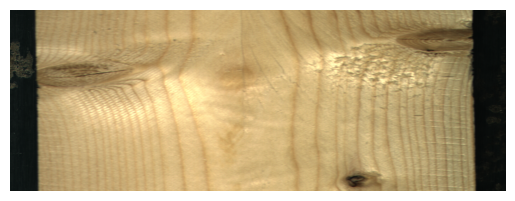

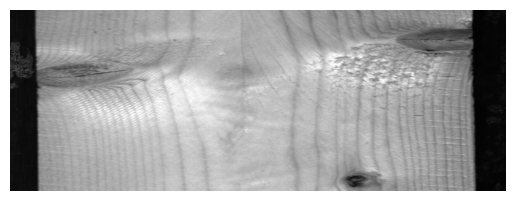

In [12]:
img_path = r'..//images//samples//99300070.bmp'
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

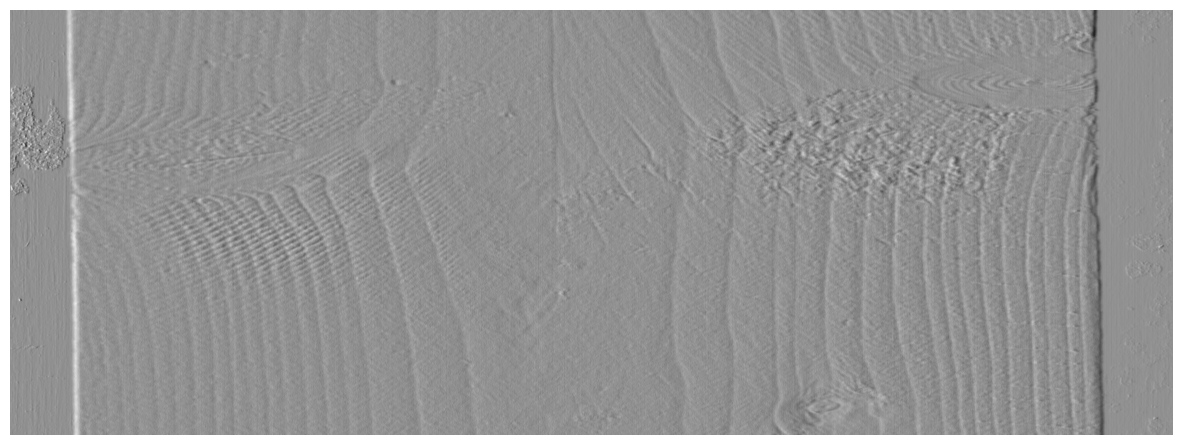

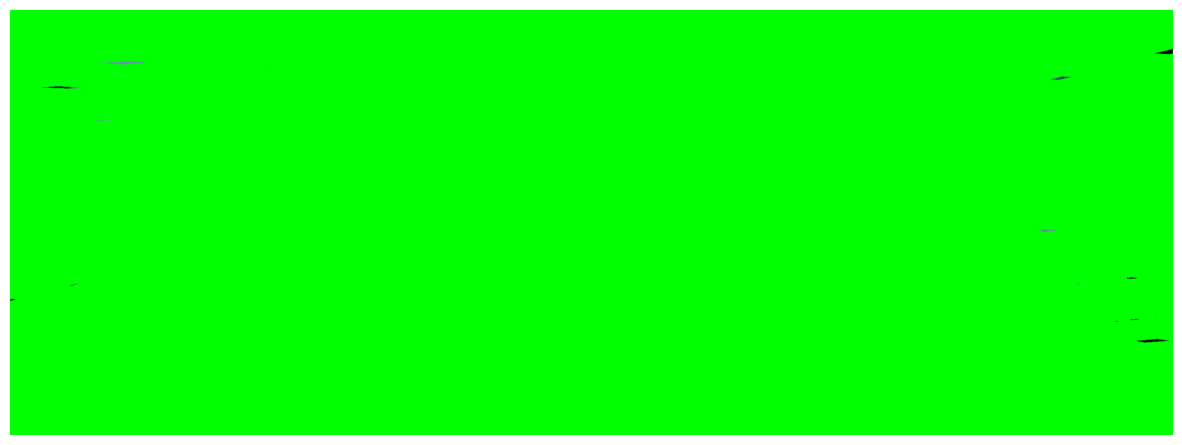

In [20]:
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
res = cv2.normalize(sobelx, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)

lines = cv2.HoughLinesP(res,1,np.pi/180,150,minLineLength=160,maxLineGap=10)
#params=
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)


plt.figure(figsize=(15,10))
plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.show()